# Guía ANOVA

Ejercicio 1 (Problema 2 del capítulo 1 del libro)

a) Modelo:

$$y_{ij} = \mu + \alpha_{i} + \epsilon_{ij}$$

$i = 1..3, j = 1..5$

In [10]:
datos = read.delim("/home/emiliano/EstadisticaAplicada/practica/C2P1datos.txt", sep = "")
attach(datos)

# Semaforos: P(rogramado) , S(emiactivado), A(ctivado)

The following objects are masked from datos (pos = 3):

    Semaforo, Tiempo



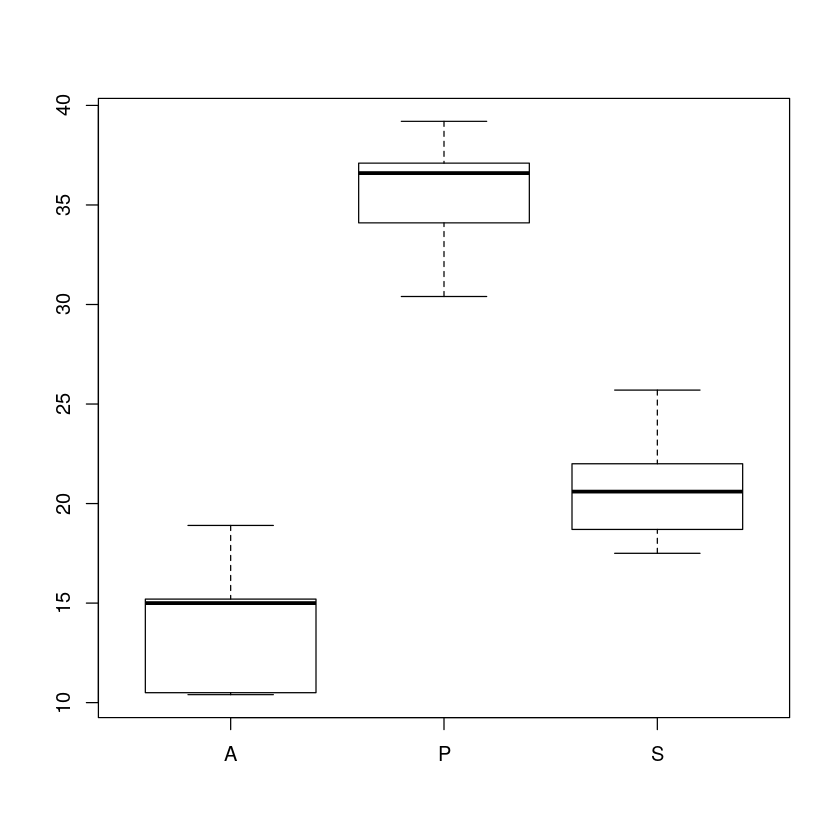

In [11]:
boxplot(Tiempo~Semaforo)

El boxplot no es muy útil porque son pocos datos, entonces mejor los vemos a los datos de esta manera

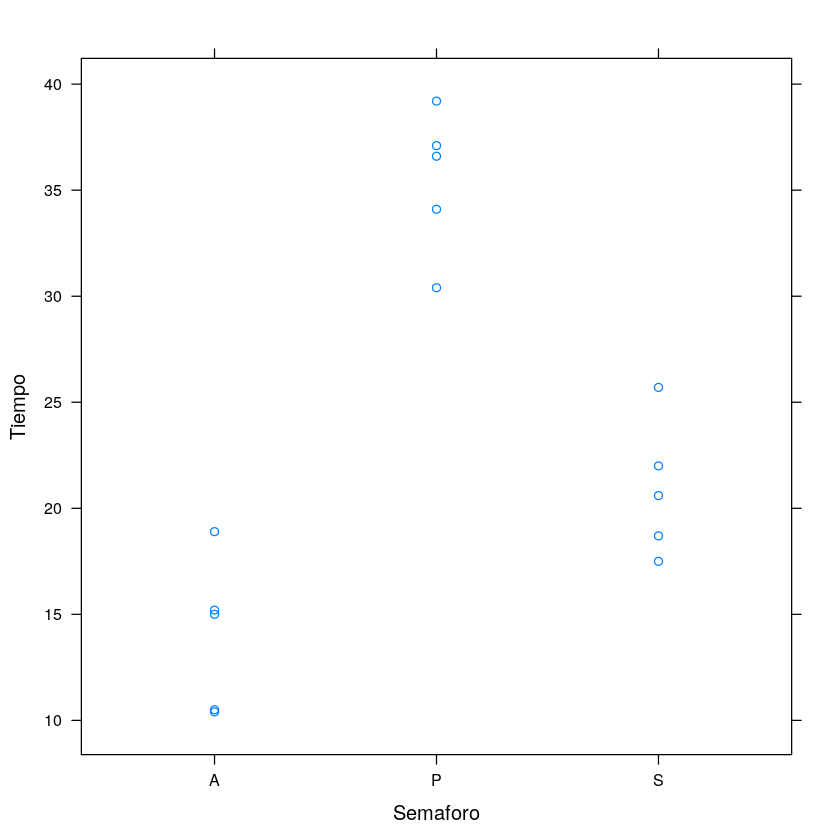

In [12]:
library(lattice)
xyplot(Tiempo~Semaforo, data = datos)

In [13]:
modelo = aov(Tiempo~Semaforo, data = datos)
summary(modelo)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Semaforo     2 1202.6   601.3   52.35 1.18e-06 ***
Residuals   12  137.8    11.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Que nos dice la tabla**

1ra fila: Sum Sq es la suma entre los distintos grupos
2da fila: 

los cuadrados medio de los residuals es el $Sp^2$

ahi nos da el p-valor también, si lo queremos estimar:



In [15]:
pval = 1-pf(52.35, 2, 12)
pval

[1] 1.182122e-06

Ahora lo que vamos a hacer es chequear los supuestos:

- en este caso la NORMALIDAD de los errores, en este caso lo vamos a estimar a los errores a partir de los residuos. El análisis se hace sobre los residuos.

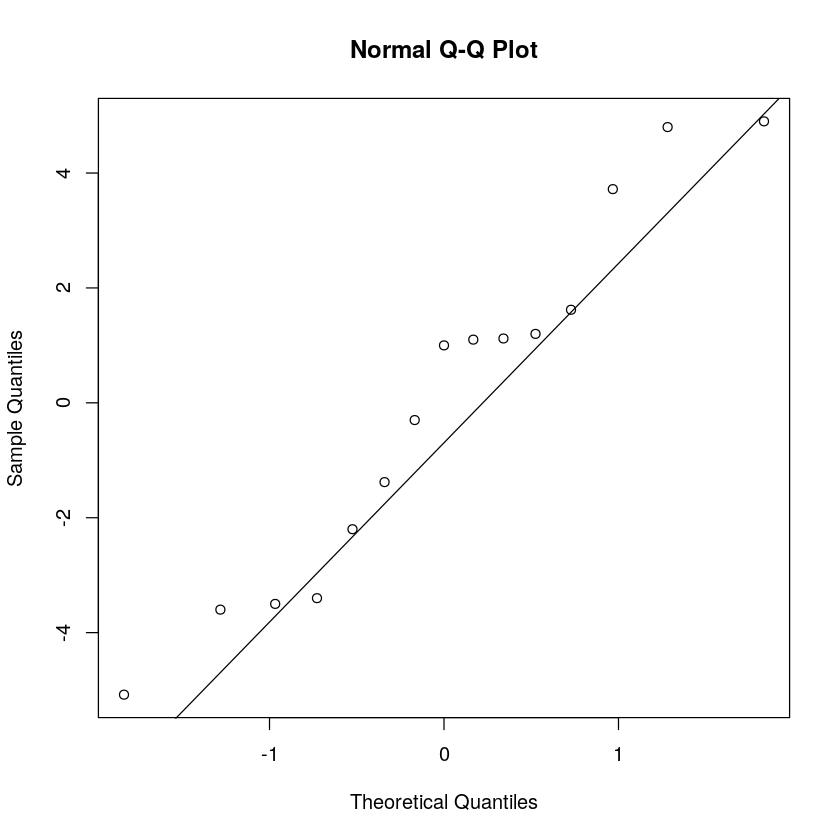

In [16]:
qqnorm(modelo$residuals)
qqline(modelo$residuals)

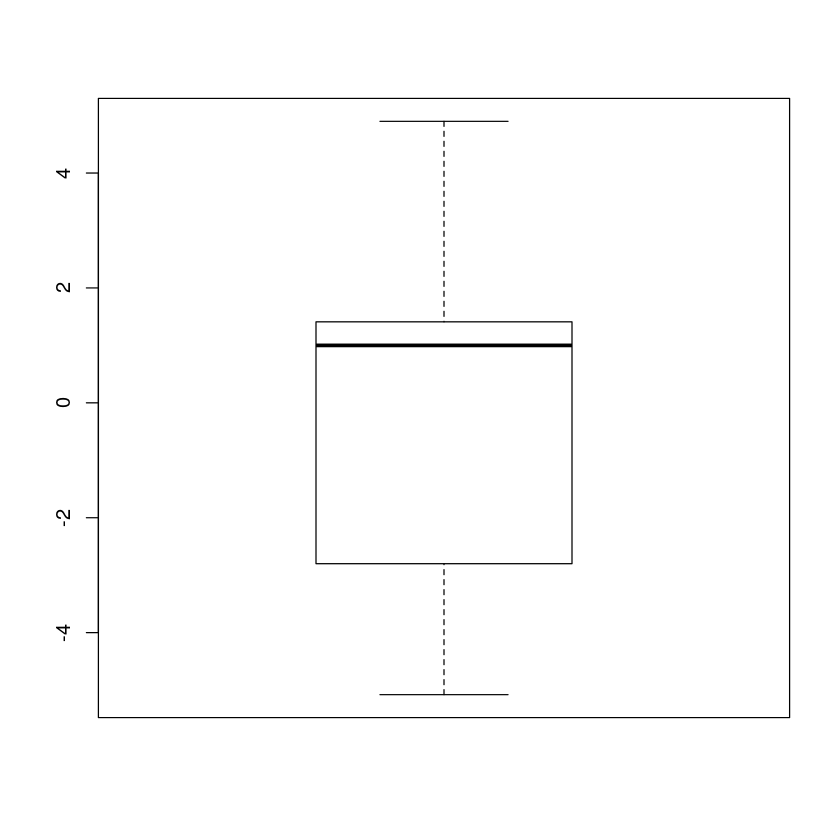

In [17]:
boxplot(modelo$residuals)

Shapiro me testea si puedo aceptar la suposición de normalidad, usa el test:

- H0: datos normales
- H1: datos no normales

asi que otra vez, vamos a querer un pvalor grande

In [18]:
# me intenta dar evidencia de que los datos son normales, como el pvalor es grande, acepto H0, que el H0 en este caso
# es que la distribución de los datos es normal. 

# VER EN CARPETA CLASE 10 

shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.94319, p-value = 0.4242


Con el test de levene vemos si la suposición de que las varianzas son iguales, es cierta. Lo que necesitamos es que nos de un p-valor grande, lo que significa que H0 es aceptada, o sea, levene hace este test:

- H0: varianzas iguales
- H1: varianzas distintas

In [19]:
library(car)
leveneTest(modelo)

Loading required package: carData


,Df,F value,Pr(>F)
group,2,0.03271307,0.9679022
,12,NA,NA


In [20]:
#d) me da el IC y los estimadores puntuales de las medias, que con una muestra pequeña 
# no tiene mucho sentido, asi que lo que nos importa son los IC

library(lsmeans)
medias = lsmeans(modelo, "Semaforo")
medias

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.


 Semaforo lsmean      SE df lower.CL upper.CL
 A         14.00 1.51563 12 10.69773 17.30227
 P         35.48 1.51563 12 32.17773 38.78227
 S         20.90 1.51563 12 17.59773 24.20227

Confidence level used: 0.95 

In [23]:
# ahora hagamos a pata los IC para la media de cada grupo
# como tenemos normalidad pq ya lo chequeamos antes

#$$y
alpha = 0.05
r = 5
N = length(Tiempo)
g = 3
A = qt(1-alpha/2, N-g)
MSE = 11.5 # lo obtengo de la tabla anova, mi S2 q estima pq no tengo la varianza
s = sqrt(MSE/r)
s = summary(medias)$SE
ybarras = summary(medias)$lsmean

# con esto pego las columnas
cbind(ybarras-A*s, ybarras+A*s)

10.69773,17.30227
32.17773,38.78227
17.59773,24.20227


Contrastes: Queremos saber si hay diferencia entre la medias de los semaforos programados y las medias del resto

$$C_1 = \mu_p - 1/2(\mu_A+\mu_s)$$

In [26]:
# tenemos la restricción que los k suman cero cada uno
k1 = c(-1/2, 1, -1/2)
k2 = c(-1, 0, 1)
# vemos que son ortogonales
sum(k1*k2)



[1] 0

In [27]:
# AHORA QUEREMOS estimar cuánto vale el valor del contraste 
ybarras = summary(medias)$lsmean

In [33]:
# estimadores para cada contraste:
C1 = sum(k1*ybarras)
C2 = sum(k2*ybarras)

In [34]:
C1
C2

[1] 18.03

[1] 6.9

In [35]:
#ybarras
## es lo mismo que hacer
#tapply(Tiempo, Semaforo, mean)

Ahora con los estimadores de los contrastes tenemos que hacer el test

- H0: C1 = 0
- H1: C1 <> 0

¿Cómo lo testeamos?

Armamos un IC con el estimador:

- C1 +/- A * var(C1)


$$var(C1) = var(\sum_{i=1}^{3} k_i \overline{y}_{i .})$$

In [36]:
r = 5
MSE = 11.5

SE_C1 = sqrt(MSE*sum(k1^2)/r)
SE_C2 = sqrt(MSE*sum(k2^2)/r)

In [37]:
# estimador de la sqrt de la varianza
SE_C1
SE_C2

[1] 1.857418

[1] 2.144761

Una vez que tenemos esto armamos el IC y luego el test

Hacemos el test armando el estadistico $t_0 = C_1-0 / \sqrt(var(C1))$

i) H0: Ci = 0, i = 1, 2 (pag. 79)

In [38]:
t1 = C1/SE_C1
pvalor1 =  2*(1-pt(t1, 12))
pvalor1

[1] 4.933546e-07

In [39]:
# lo mismo para semaforos semiactivados con activados
t2 = C2/SE_C2
pvalor2 =  2*(1-pt(t2, 12))
pvalor2

[1] 0.007393587

In [40]:
# entonces se rechazan ambas (rechazamos la H0, que decia que C1 = 0)

In [43]:
# j) algunos libros lo definen con una F, que es lo mismo, con lo anterior ya esta, pero también podríamos hacerlo asi, 
# pero no lo hacemos, copié lo que tenía el profe pero no vi que sería el SCC1 (suma de cuadrado para los contrastes, 
# ver libro)
# se haría para cada contraste
# F1 = SCC1 / MSE
# pvalor1 = 1-pf(F1, 1,12)

In [46]:
#l) queremos comprar contra el mejor
source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R") # llamo al archivo dnd esta la funcion minHSU


In [47]:
# usamos min porque el mejor es el menor
minHSU(Tiempo, Semaforo, alpha=0.05, MSE, 12)

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "A"


[1] NA  "A"

nos da el mejor y luego si hay alguno que sea equivalente al mejor. Nos dice que el mejor es A y que no hay ninguno equivalente (NA)